In [52]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [53]:
def list_csv_files(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    return csv_files

In [54]:
def load_and_process_csv(file_path):
    df = pd.read_csv(file_path,header=None)
    return df.iloc[:,:4]    

In [55]:
df = pd.read_csv("shivang51.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7
0,300074,233255,180406,170009,0,0,0,0
1,300107,233298,180506,170026,0,0,0,0
2,300069,233186,180483,170026,0,0,0,0
3,300029,233094,180408,170018,0,0,0,0
4,300065,233188,180442,170023,0,0,0,0


In [56]:
df = df.iloc[:,:4]
df.head()

,0,1,2,3
0,300074,233255,180406,170009
1,300107,233298,180506,170026
2,300069,233186,180483,170026
3,300029,233094,180408,170018
4,300065,233188,180442,170023


In [57]:
len(df)

23446

In [58]:
def extract_center_rows(data, start_range, end_range, length):
    # Ensure that the range is valid
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")

    if end_range - start_range<length:
        return False,0
    # Get the rows within the specified range
    range_data = data.loc[start_range:end_range]
    
    # Ensure that the length is not greater than the number of rows in the range
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")
    
    # Calculate the center of the range
    center_index = len(range_data) // 2
    
    # Calculate the starting and ending indices for the extraction
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    
    # Extract the rows from the DataFrame
    center_rows = range_data.iloc[start_index:end_index]
    
    return True,center_rows

In [59]:
numeric_labels = ["one.png","two.jpg","three.jpg","four.jpg","five.jpg","six.jpg","seven.jpg","eight.jpg","nine.jpg"]
non_numeric_label = "animal.jpg"
def process_label(label):
    return label.removesuffix(".png").removesuffix(".jpg")

In [60]:
datashape = (1000,4)

# Y encoding 
0->Numerical , 1-> Non Numerical

In [61]:
def extract_data_between_markers(data, start_marker, end_marker):
    start_idx = data.index[data[0] == start_marker].tolist()[0]
    end_idx = data.index[data[0] == end_marker].tolist()[0]
    return extract_center_rows(data,start_idx,end_idx,datashape[0])

In [62]:
X,Y = [],[]

In [63]:
for f in list_csv_files("."):
    data = load_and_process_csv(f)
    for l in numeric_labels:
        has_data,value = extract_data_between_markers(data,"start "+l,"end "+l)
        if has_data:
            X.append(np.array(value,dtype='float'))
            Y.append(0)

In [64]:
for f in list_csv_files("."):
    data = load_and_process_csv(f)
    has_data,value = extract_data_between_markers(data,"start "+l,"end "+l)
    if has_data:
        X.append(np.array(value,dtype='float'))
        Y.append(1)

In [65]:
X = np.array(X)
Y= np.array(Y)
assert(len(X)==len(Y))
len(Y)

181

In [66]:
X.shape

(181, 1000, 4)

In [67]:
scaler = RobustScaler()
scaler.fit(X[0])
for i,v in enumerate(X):
    X[i] = scaler.transform(v)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [69]:
X_train[:5]

array([[[ 1.25991916e+02,  3.30002524e+02,  2.50415610e+03,
          3.38805254e+03],
        [ 1.25935330e+02,  3.30079495e+02,  2.50409322e+03,
          3.38803220e+03],
        [ 1.26041889e+02,  3.30070662e+02,  2.50428618e+03,
          3.38827966e+03],
        ...,
        [ 1.27187580e+02,  3.31632808e+02,  2.51601951e+03,
          3.40163559e+03],
        [ 1.27365423e+02,  3.31568454e+02,  2.51632304e+03,
          3.40196102e+03],
        [ 1.27513871e+02,  3.31468770e+02,  2.51654417e+03,
          3.40217119e+03]],

       [[-5.75796436e+01,  2.12479495e+01,  1.38887154e+03,
          1.06037119e+03],
        [-5.76288811e+01,  2.13488959e+01,  1.38889539e+03,
          1.06031356e+03],
        [-5.76869374e+01,  2.15495268e+01,  1.38886287e+03,
          1.06042203e+03],
        ...,
        [-5.86092229e+01,  2.28189274e+01,  1.39214526e+03,
          1.05933729e+03],
        [-5.85452875e+01,  2.26422713e+01,  1.39214959e+03,
          1.05930678e+03],
        [-5.851

In [70]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=(datashape[0],datashape[1],1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='relu'),
])

/home/shivang/miniforge3/envs/bcs/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [72]:
history = model.fit(X_train,y_train,epochs=150,validation_split=0.1)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 676ms/step - accuracy: 0.6504 - loss: 5.5788 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9030 - loss: 1.5616 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9186 - loss: 1.3107 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8705 - loss: 2.0836 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8840 - loss: 1.8646 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8695 - loss: 2.0977 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9160 - loss: 1.3513 - val_accuracy: 0.8824 - val_loss: 1.8962
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9443 - loss: 0.8973 - val_accuracy: 0.8824 - val_loss: 1.896

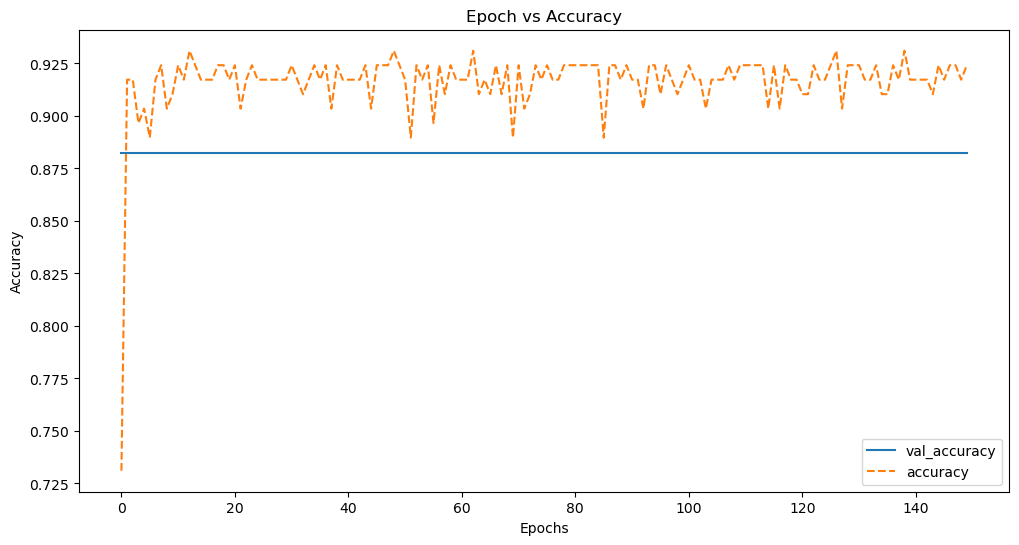

In [73]:
plt.figure(figsize=(12, 6))
plt.title("Epoch vs Accuracy")
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], linestyle='--', label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

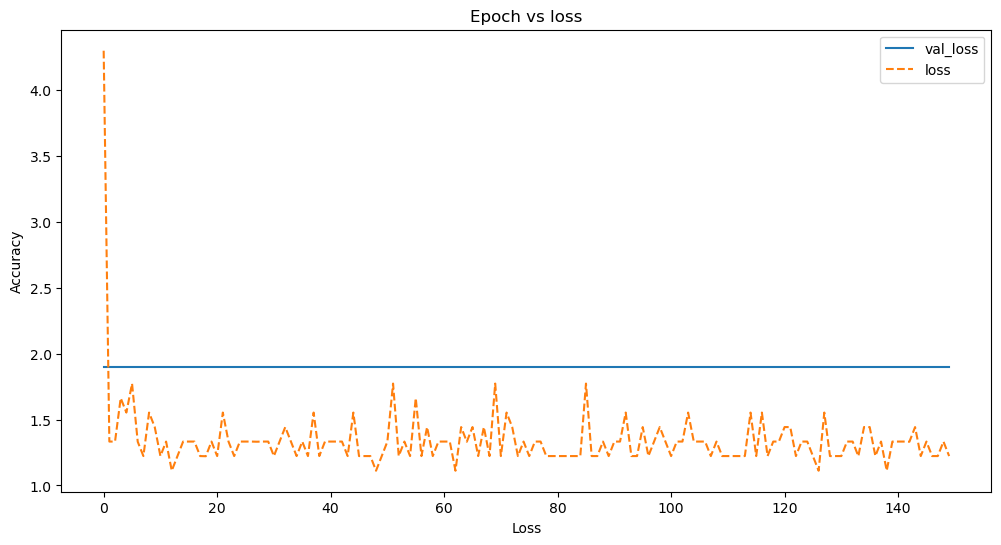

In [74]:
plt.figure(figsize=(12, 6))
plt.title("Epoch vs loss")
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], linestyle='--', label='loss')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
np.unique(y_test)

array([0, 1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


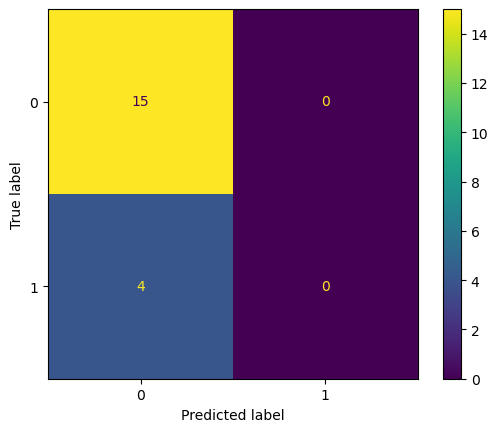

In [78]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test),labels=[0,1])
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

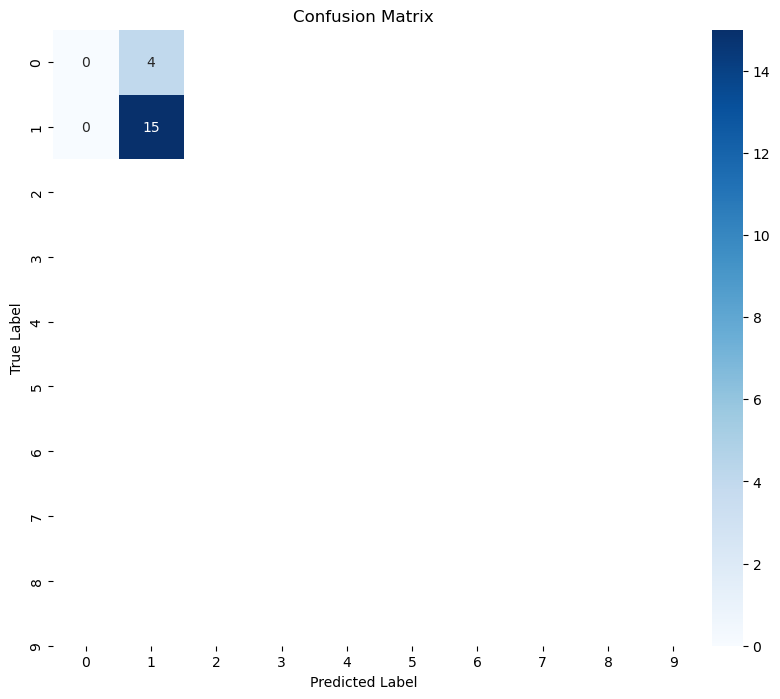

In [77]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()